In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("./results.csv", index_col=0)

df

,folder_id,position_id,label,intensity_mean,intensity_max,centroid-0,centroid-1,centroid-2,area_filled
0,ANP32A_N4,1,1,12.378336,255.0,20.571527,374.311348,25.074347,14540.0
1,ANP32A_N4,1,2,4.317102,65.0,18.783799,88.222357,34.940317,9098.0
2,ANP32A_N4,1,3,9.201468,255.0,21.138459,542.593574,49.092813,11173.0
3,ANP32A_N4,1,4,19.957376,255.0,12.472107,646.237623,122.217171,9877.0
4,ANP32A_N4,1,5,8.319921,255.0,15.055299,49.048593,142.216689,9096.0
...,...,...,...,...,...,...,...,...,...
1002,ANP32B_water,8,25,22.452511,131.0,12.745312,599.167574,615.069066,9918.0
1003,ANP32B_water,8,26,18.585152,103.0,15.358397,135.391129,622.388283,8432.0
1004,ANP32B_water,8,27,20.157986,235.0,13.026729,466.806650,641.477358,10887.0
1005,ANP32B_water,8,28,19.620646,122.0,15.503555,616.107011,666.382414,11111.0


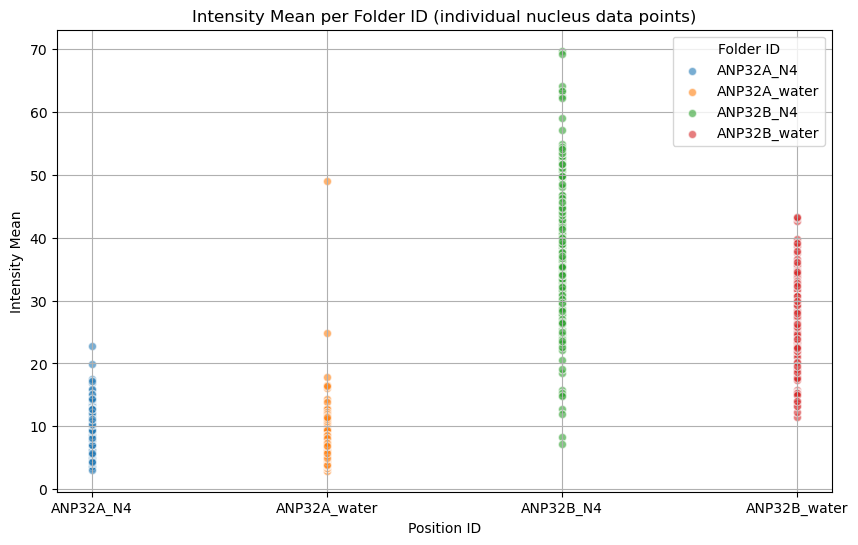

In [9]:
# Group the DataFrame by 'folder_id'
grouped_df = df.groupby('folder_id')

# Setup the plot
plt.figure(figsize=(10, 6))

# Iterate over each group
for name, group in grouped_df:
    plt.scatter(group['folder_id'], group['intensity_mean'], label=name, alpha=0.6, edgecolors='w')

# Add some plot decorations
plt.xlabel('Position ID')
plt.ylabel('Intensity Mean')
plt.title('Intensity Mean per Folder ID (individual nucleus data points)')
plt.legend(title='Folder ID')
plt.grid(True)

# Show the plot
plt.show()

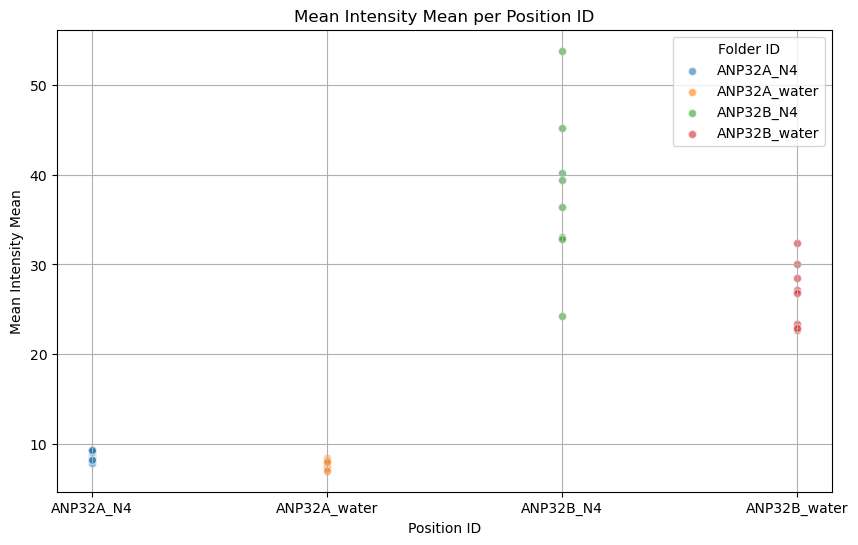

In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# First, group by both 'folder_id' and 'position_id', then calculate the mean 'intensity_mean' for each group
mean_intensity = df.groupby(['folder_id', 'position_id'])['intensity_mean'].mean().reset_index()

# Now, group the result by 'folder_id' to plot each 'folder_id' separately
grouped = mean_intensity.groupby('folder_id')

# Setup the plot
plt.figure(figsize=(10, 6))

# Iterate over each group
for name, group in grouped:
    plt.scatter(group['folder_id'], group['intensity_mean'], label=name, alpha=0.6, edgecolors='w')

# Add some plot decorations
plt.xlabel('Position ID')
plt.ylabel('Mean Intensity Mean')
plt.title('Mean Intensity Mean per Position ID')
plt.legend(title='Folder ID')
plt.grid(True)

# Show the plot
plt.show()


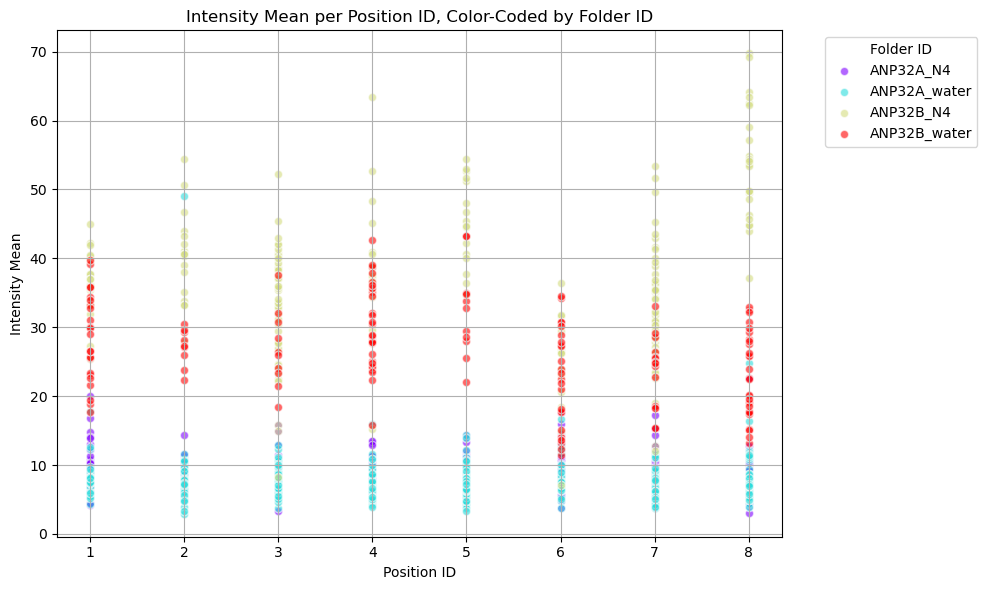

In [15]:
import matplotlib.pyplot as plt

# Setup the plot
plt.figure(figsize=(10, 6))

# Create a color map based on unique folder_id
folder_ids = df['folder_id'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(folder_ids)))
color_map = dict(zip(folder_ids, colors))

# Iterate over each group
for folder_id, group in df.groupby('folder_id'):
    # Use 'position_id' for x-axis, 'intensity_mean' for y-axis, and color-code by 'folder_id'
    plt.scatter(group['position_id'], group['intensity_mean'], label=folder_id, 
                alpha=0.6, edgecolors='w', color=color_map[folder_id])

# Add some plot decorations
plt.xlabel('Position ID')
plt.ylabel('Intensity Mean')
plt.title('Intensity Mean per Position ID, Color-Coded by Folder ID')
plt.legend(title='Folder ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# Store mean intensity within nuclei df as .csv
mean_intensity.to_csv("./mean_intensity.csv")